In [146]:
import requests
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.externals import joblib


In [90]:
r = requests.get('http://localhost:7501').json()


In [93]:
df =pd.DataFrame()
y=[]
for key in r:
    y.append(r[key]['y'])
    x = []
    for sample in r[key]['x']:
        x.append(sample['x'])
        x.append(sample['y'])
        x.append(sample['z'])
    df=pd.concat([df,pd.DataFrame(x).transpose()])

df.reset_index(drop=True, inplace=True)   
# take only first 20 columns
df = df[df.columns[0:20]]


In [153]:
rn = RandomForestClassifier()
model = rn.fit(df, y)
joblib.dump(model, 'model.pkl') 


['model.pkl']

In [184]:
r

{'x': [{'x': 0.8477935791015625,
   'y': -0.4477081298828125,
   'z': -0.103759765625},
  {'x': 0.8956146240234375, 'y': -0.47412109375, 'z': -0.0821075439453125},
  {'x': 0.881072998046875, 'y': -0.4380950927734375, 'z': -0.0793609619140625},
  {'x': 0.959564208984375, 'y': -0.460296630859375, 'z': -0.072601318359375},
  {'x': 1.0059814453125, 'y': -0.5137481689453125, 'z': 0.00433349609375},
  {'x': 1.074737548828125, 'y': -0.4689178466796875, 'z': 0.1010284423828125},
  {'x': 1.088592529296875, 'y': -0.1843109130859375, 'z': 0.0042724609375},
  {'x': 1.1579742431640625, 'y': -0.045013427734375, 'z': -0.088409423828125},
  {'x': 1.2232208251953125,
   'y': -0.0626068115234375,
   'z': -0.0591583251953125},
  {'x': 1.1480712890625, 'y': 0.062896728515625, 'z': -0.0845184326171875},
  {'x': 0.94805908203125, 'y': 0.0525665283203125, 'z': -0.1136016845703125},
  {'x': 0.82342529296875, 'y': 0.0363922119140625, 'z': -0.0730438232421875},
  {'x': 0.691619873046875, 'y': -0.111373901367187

In [182]:
import numpy as np
from sklearn.externals import joblib


model = joblib.load('model.pkl') 
payload=r
x = []
for sample in payload['x']:
    x.append(sample['x'])
    x.append(sample['y'])
    x.append(sample['z'])
x=x[0:20]
model.predict(np.array(x).reshape(1, -1))

array([1])

In [162]:
df=pd.concat([df,pd.DataFrame(x).transpose()])

df.reset_index(drop=True, inplace=True)   
# take only first 20 columns
df = df[df.columns[0:20]]

In [181]:
import numpy as np
np.array(x).reshape(1, -1)


array([[ 0.84779358, -0.44770813, -0.10375977,  0.89561462, -0.47412109,
        -0.08210754,  0.881073  , -0.43809509, -0.07936096,  0.95956421,
        -0.46029663, -0.07260132,  1.00598145, -0.51374817,  0.0043335 ,
         1.07473755, -0.46891785,  0.10102844,  1.08859253, -0.18431091]])

In [118]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df,y, test_size=0.3)
rn = RandomForestClassifier()
rn.fit(x_train, y_train)
predictions = rn.predict(x_test)
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

             precision    recall  f1-score   support

          1       1.00      1.00      1.00         1
          2       1.00      1.00      1.00         3
          3       1.00      1.00      1.00         2

avg / total       1.00      1.00      1.00         6

[[1 0 0]
 [0 3 0]
 [0 0 2]]


/Users/kzahir/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


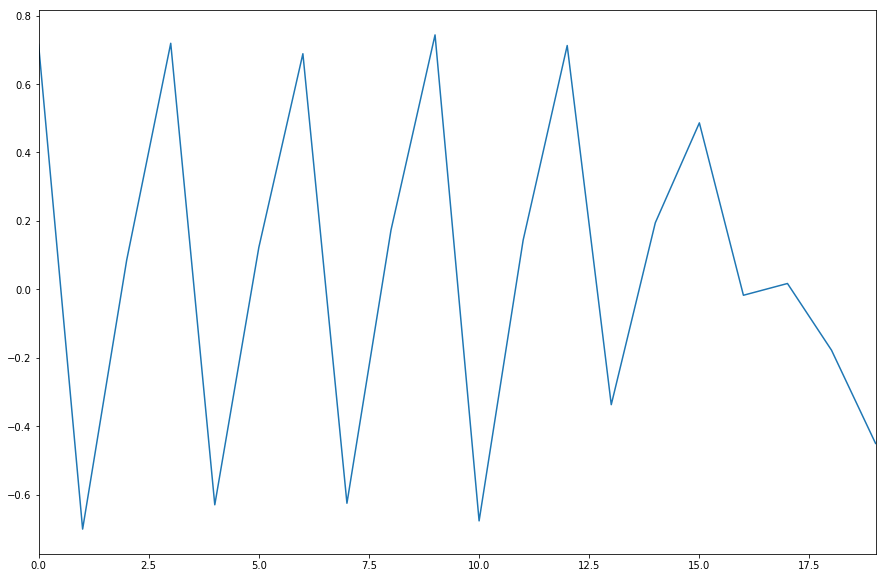

In [143]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
dummy = df.copy()
dummy['y']=y
y1 = dummy[dummy['y']==3]
y1.drop('y', axis=1,inplace=True)
y1n = y1[y1.columns[1::3]]
for i in range(1):
    y1.iloc[i].plot()